In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [10]:
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,'Number of houses')

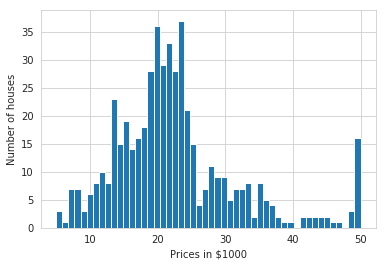

In [14]:
plt.hist(boston.target,bins=50)

plt.xlabel("Prices in $1000")
plt.ylabel("Number of houses")

Text(0,0.5,'Number of rooms')

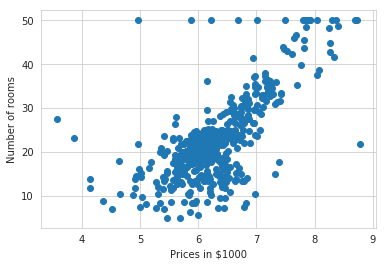

In [17]:
plt.scatter(boston.data[:,5],boston.target)

plt.xlabel("Prices in $1000")
plt.ylabel("Number of rooms")

In [18]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
boston_df['Price'] = boston.target

In [20]:
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


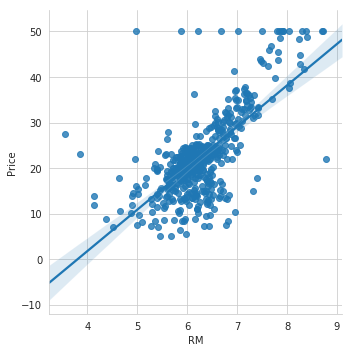

In [21]:
sns.lmplot("RM","Price",data=boston_df)

The mathematics behind the Least Squares Method

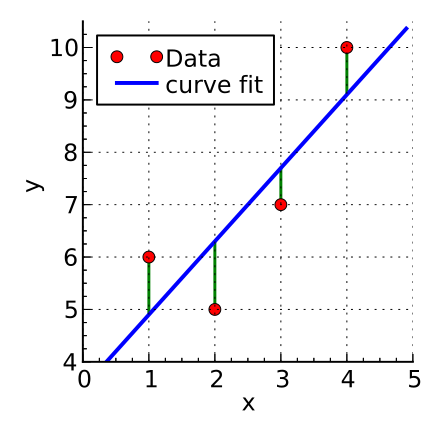

In [23]:
from IPython.display import Image
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/440px-Linear_least_squares_example2.svg.png"
Image(url)

Using Numpy for univariate linear regression

In [101]:
#X as median room values
X = boston_df.RM

#use v to make X two-dimensional and create the array need for the numpy's least square method
X = np.vstack([X,np.ones(len(X))]).T

#Y as the target price of the houses
Y = np.array(boston_df.Price)

In [102]:
print(X.shape)
X
print(Y.shape)

(506, 2)
(506,)


In [104]:
m , b = np.linalg.lstsq(X,Y)[0]

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [105]:
print (m , b)

9.102108981180313 -34.670620776438575


Getting the error

In [115]:
#Resulting array
result = np.linalg.lstsq(X,Y)

#Getting the error
error_total = result[1]

#Getting the Root Mean Square Error
rmse = np.sqrt(error_total / len(X))

# Print
print("The Root Mean Square Error was %.2f" %rmse)

The Root Mean Square Error was 6.60


/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


RMSE +-= Std --> the price won't vary 2 times $6.60k 95% of the time.

In [118]:
#Importing Sklearn
import sklearn
from sklearn.linear_model import LinearRegression

In [119]:
lreg = LinearRegression()

In [120]:
X_multi = boston_df.drop("Price",1)

Y_target = boston_df.Price

In [121]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [126]:
print("The estimated intercept coefficient is {:.2f}".format(lreg.intercept_))
print("The number of coefficients used is {}".format(len(lreg.coef_)))

The estimated intercept coefficient is 36.49
The number of coefficients used is 13


In [128]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

In [134]:
coeff_df.sort_values(by="Coefficient Estimate",ascending=False,inplace=True)

In [135]:
coeff_df

,Features,Coefficient Estimate
5,RM,3.804752
3,CHAS,2.688561
8,RAD,0.305655
1,ZN,0.046395
2,INDUS,0.020860
11,B,0.009393
6,AGE,0.000751
9,TAX,-0.012329
0,CRIM,-0.107171
12,LSTAT,-0.525467


Using Training and Validation

In [136]:
from sklearn.cross_validation import train_test_split

In [144]:
#70-30 (Train - Test)
X_train,X_test,Y_train,Y_test = train_test_split(X,boston_df.Price)

In [145]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [146]:
lreg = LinearRegression()

lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
pred_train = lreg.predict(X_train)

pred_test = lreg.predict(X_test)

In [155]:
print("Fit a model X_train, and calculate the MSE with Y_train : {:.2f}".format(np.mean((Y_train - pred_train)**2)))
print("Fit a model X_train, and calculate the MSE with X_test and Y_test : {:.2f}".format(np.mean((Y_test - pred_test)**2)))

Fit a model X_train, and calculate the MSE with Y_train : 47.19
Fit a model X_train, and calculate the MSE with X_test and Y_test : 32.89


Residual plots : Residual = Observed - Predicted

Text(0.5,1,'Residual plot')

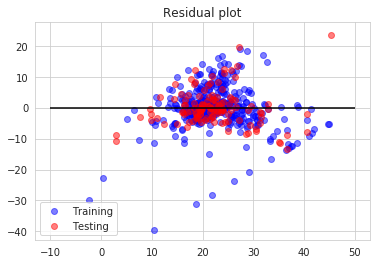

In [156]:
#Scatter plot the training data
Train = plt.scatter(pred_train,(pred_train -  Y_train),c="b",alpha="0.5")

#Scatter plot the test data
Test = plt.scatter(pred_test,(pred_test - Y_test),c="r",alpha="0.5")

#Plot a horizontal axis line at 0
plt.hlines(y = 0, xmin=-10, xmax=50)

#labels
plt.legend((Train,Test),("Training","Testing"),loc="lower left")
plt.title("Residual plot")